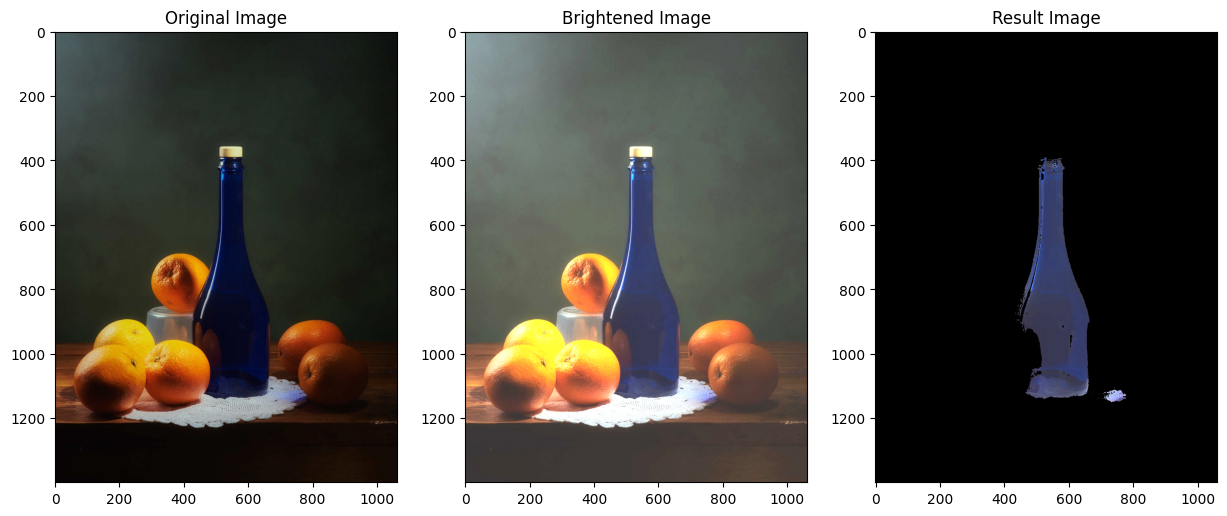

In [1]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import estimate_bandwidth
import matplotlib.pyplot as plt

img = cv.imread('iyYGSuRDcLE.jpg')

bright_img = cv.convertScaleAbs(img, alpha=1.2, beta=50)

hsv = cv.cvtColor(bright_img, cv.COLOR_BGR2HSV)

lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Создаем изображение такого же размера, как исходное, но заполненное нулями
result = np.zeros_like(bright_img)

# Применяем условие для каждого пикселя в hsv изображении
result[(hsv[:,:,0] >= lower_blue[0]) & (hsv[:,:,0] <= upper_blue[0]) & 
       (hsv[:,:,1] >= lower_blue[1]) & (hsv[:,:,1] <= upper_blue[1]) & 
       (hsv[:,:,2] >= lower_blue[2]) & (hsv[:,:,2] <= upper_blue[2])] = bright_img[(hsv[:,:,0] >= lower_blue[0]) & 
                                                                                    (hsv[:,:,0] <= upper_blue[0]) & 
                                                                                    (hsv[:,:,1] >= lower_blue[1]) & 
                                                                                    (hsv[:,:,1] <= upper_blue[1]) & 
                                                                                    (hsv[:,:,2] >= lower_blue[2]) & 
                                                                                    (hsv[:,:,2] <= upper_blue[2])]

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(bright_img, cv.COLOR_BGR2RGB))
plt.title('Brightened Image')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.show()

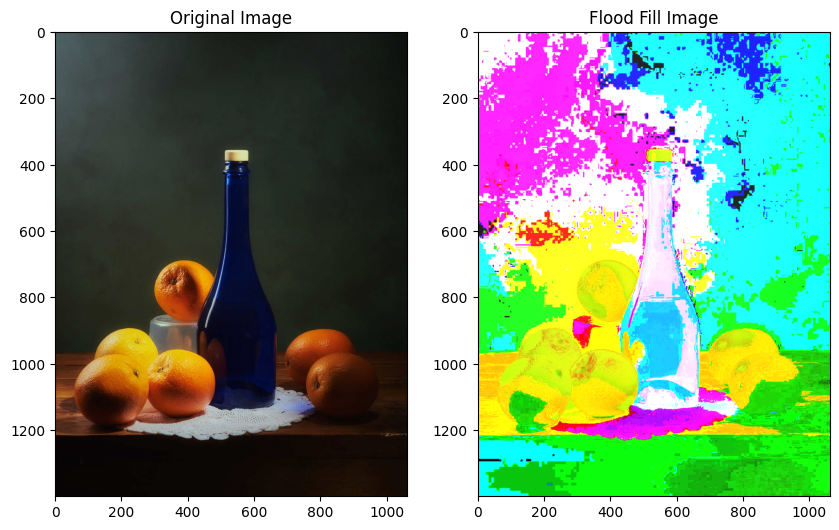

In [2]:
# (Region-based) Разрастание областей (region growing)
from skimage.segmentation import flood, flood_fill

seed_point = (800, 600, 0)
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
tolerance = 70# Установим пороговое значение - меру разницы между выбранным пикселем и его соседями
out_img = flood_fill(hsv_img, seed_point, new_value=255, tolerance=tolerance)

# отображение оригинального изображения
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Matplotlib ожидает RGB
plt.title('Original Image')

# отображение модифицированного изображения
plt.subplot(122)
plt.imshow(cv.cvtColor(out_img, cv.COLOR_BGR2RGB)) # Matplotlib ожидает RGB
plt.title('Flood Fill Image')
plt.show()

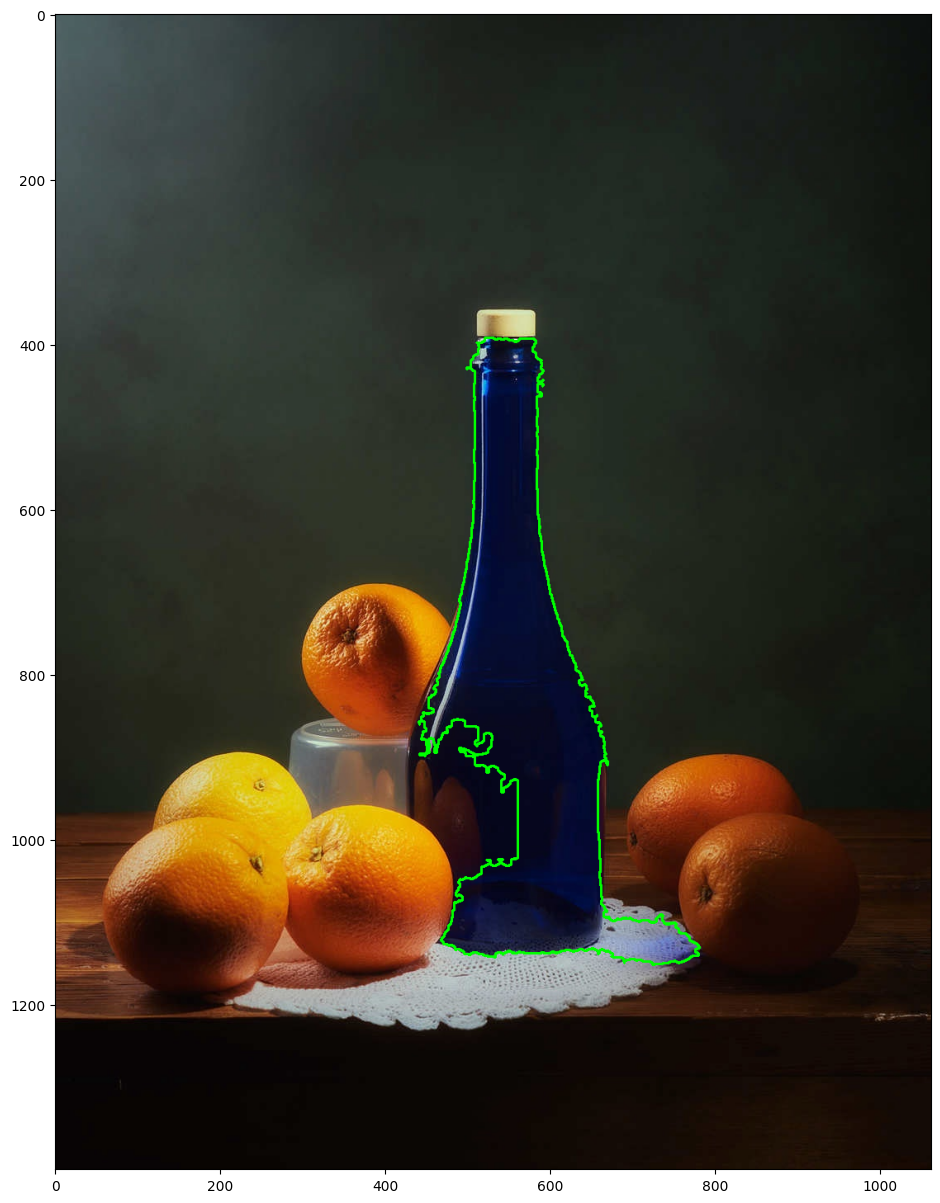

In [9]:
# Методы кластеризации
image = cv.imread('iyYGSuRDcLE.jpg')

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
blue_lower = (90,30,30)
blue_upper = (130,255,255)
mask = cv.inRange(hsv_image, blue_lower, blue_upper)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
morphology = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
contours, _ = cv.findContours(morphology, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
if contours:
    max_contour = max(contours, key=cv.contourArea)
    cv.drawContours(image, [max_contour], -1, (0, 255, 0), 2)

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.imshow(image_rgb)
plt.show()